In [181]:
from pyspark import SparkContext 

In [239]:
sc = SparkContext(master='local',appName='Olimpic_games')

In [21]:
%ls

deporte.csv      deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv           paises.csv
deportista.csv   juegos.csv           resultados.csv


In [3]:
path = '/home/cesar/Documents/prac_sp/curso-apache-spark-platzi/files/'
RDD_paises = sc.textFile(path+'paises.csv').map(lambda file : file.split(',') )

In [5]:
RDD_paises.take(20)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG'],
 ['5', 'Afghanistan', 'AFG'],
 ['6', 'Akatonbo', 'IRL'],
 ['7', 'Alain IV', 'SUI'],
 ['8', 'Albania', 'ALB'],
 ['9', 'Alcaid', 'POR'],
 ['10', 'Alcyon-6', 'FRA'],
 ['11', 'Alcyon-7', 'FRA'],
 ['12', 'Aldebaran', 'ITA'],
 ['13', 'Aldebaran II', 'ITA'],
 ['14', 'Aletta', 'IRL'],
 ['15', 'Algeria', 'ALG'],
 ['16', 'Ali-Baba II', 'SWE'],
 ['17', 'Ali-Baba IV', 'SUI'],
 ['18', 'Ali-Baba IX', 'SUI'],
 ['19', 'Ali-Baba VI', 'SUI']]

# Count

Contar cuantos equipos hay, por sus siglas, para eso uso la función count(), pero antes, seleciono solo los valores distintos

In [58]:
RDD_paises.map(lambda x : x[2]).distinct().count()

231

En el caso de tener una cantidad de datos muy grande, y necesito saber cuantas rows hay, puedo usar la funcion de countApprox(), la cúal yo le doy una cantidad de milesegundos que quiero destinar a la tarea, en caso de que el timepo se agote y no haya terminado de contar, me devuleve el número de rows que llevaba para ese momento 

In [67]:
#El valor de countApprox esta en milesegundos 
RDD_paises.map(lambda x : x[2]).distinct().countApprox(20)

231

# Group BY

Contar la cantidad de veces que se repite una sigla.
Para esto tengo que ahcer un groupby. Primero mapeo las listas, tomo primero el valor que quiero colocar como key,
hago un groupByKey(), luego vuelvo a mapear, pero ahora mapeo los datos agrupados,y por último tomo 5 ejemplos con take()

In [59]:
RDD_paises.map(lambda x : (x[2],x[1])).groupByKey().mapValues(len).take(5)

[('sigla', 1), ('AUT', 11), ('MEX', 9), ('ARG', 18), ('AFG', 1)]

In [61]:
#As'i luce por dentro el mapValues()
RDD_paises.map(lambda x : (x[2],x[1])).groupByKey().mapValues(list).take(2)

[('sigla', ['equipo']),
 ('AUT',
  ['30. Februar',
   'Austria',
   'Austria-1',
   'Austria-2',
   'Breslau',
   'Brigantia',
   'Donar III',
   'Evita VI',
   'May-Be 1960',
   '"R.-V. Germania; Leitmeritz"',
   'Surprise'])]

Filtar por algún país

# Filter 

In [66]:
RDD_paises.filter(lambda x : x[2] == 'MEX').take(5)

[['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['193', 'Chamukina', 'MEX'],
 ['656', 'Mexico', 'MEX'],
 ['657', 'Mexico-1', 'MEX']]

# Union 

In [70]:
%ls

deporte.csv      deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv           paises.csv
deportista.csv   juegos.csv           resultados.csv


In [195]:
deportista1_rdd = sc.textFile(path+'deportista.csv').map(lambda x : x.split(','))
deportista2_rdd = sc.textFile(path+'deportista2.csv').map(lambda x : x.split(','))

deportista_rdd = deportista1_rdd.union(deportista2_rdd)

In [7]:
deportista_rdd.take(4)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273']]

In [8]:
deportista_rdd.count()

135572

Tomar una muestra aleatoria 

In [76]:
deportista_rdd.takeSample(False,10,seed=2)
#takeSample(Valores repetidos,cúatos registros quiero, semilla aleatoria)

[['134227', 'Carlos Erick Zegarra Presser', '1', '23', '202', '165', '794'],
 ['13661', 'Zenon Yanovich Bortkevich', '1', '27', '179', '80', '978'],
 ['106433', 'Massimo Scali', '1', '22', '172', '56', '509'],
 ['46508', 'Mohamed Hassanein', '1', '0', '0', '0', '308'],
 ['125686', 'Sabina Veit', '2', '22', '167', '59', '944'],
 ['112190', 'Austin Smith', '1', '23', '179', '73', '967'],
 ['29132', 'Eleni Doika', '2', '16', '168', '49', '419'],
 ['56472', 'Kaido Kaaberma', '1', '23', '194', '84', '331'],
 ['115105', 'Christopher Hugh Stevenson', '1', '27', '193', '91', '1096'],
 ['114685', 'Stanisaw Stefaski', '1', '25', '175', '62', '810']]

## Hacer un Join

In [78]:
RDD_paises.top(1)

[['id', 'equipo', 'sigla']]

In [80]:
deportista_rdd.top(1)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id']]

In [109]:
deportista_rdd.map(lambda x : [x[-1],x[:-1]]) \
                    .join(RDD_paises.map(lambda x: [x[0],x[2]])).takeSample(False,6,25)

[('362', (['131505', 'Steven Woodburn', '1', '24', '185', '90'], 'FRA')),
 ('967', (['13626', 'Jill Brresen', '2', '22', '170', '57'], 'RSA')),
 ('482', (['44299', 'Gumundur Gumundsson', '1', '23', '174', '77'], 'ISL')),
 ('970', (['68062', 'Lee MinHui', '2', '28', '174', '65'], 'KOR')),
 ('794', (['92442', 'Luis Paz Zoldan', '1', '19', '187', '82'], 'PER')),
 ('413', (['26822', 'Jared Mark Deacon', '1', '24', '185', '77'], 'GBR'))]

In [240]:
resultado = sc.textFile(path+'resultados.csv').map(lambda x : x.split(','))
resultado.count()

271117

In [10]:
resultado.top(2)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['99999', 'NA', '50604', '51', '568']]

Foltrar por los deortista que tengan medallas

In [241]:
resultado = resultado.filter(lambda x:'NA' not in x[1] )

In [242]:
resultado.top(2)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['99993', 'Silver', '50600', '39', '207']]

Unir el rdd de deportista , equipo y de resultado  

In [16]:
deportista_equipo = (deportista_rdd.map(lambda x : [x[-1],x[:-1]]) 
                    .join(RDD_paises.map(lambda x: [x[0],x[2]]))
                    .map(lambda x : ( x[1][0][0] , (x[1][0][1:],x[1][1]) )  ) #Coloco el id del deportista como principal columna
)

In [17]:
deportista_equipo.top(2)

[('99999', (['Alexander Grant Alick Rennie', '1', '32', '182', '71'], 'RSA')),
 ('99998', (['Robert John Bob Renney', '1', '21', '178', '90'], 'AUS'))]

Por ultimo agrego la columna de los resultados

In [18]:
resultado_RDD = deportista_equipo.map(lambda x : [x[0],x[1]]).join(resultado.map(lambda x: [x[2],(x[0],x[1],x[3],x[4])]))

In [19]:
resultado_RDD.take(1)

[('7597',
  ((['Bao Yingying', '2', '24', '172', '67'], 'CHN'),
   ('14078', 'Silver', '47', '445')))]

In [16]:
sc

<SparkContext master=local appName=Olimpic_games>

# operaciones númericas

In [28]:
valor_medallas = {'Gold':7,
                'Silver':5,
                'Bronze':4}

In [ ]:
('7597', 
 
 (  
     (['Bao Yingying', '2', '24', '172', '67'], 'CHN'),
     ('14078', 'Silver', '47', '445')
 )

)

In [49]:
resultado_valor = resultado_RDD.map(lambda x : (x[1][0][1],valor_medallas[x[1][1][1]]))

In [86]:
resultado_valor.take(1)

[('CHN', 5)]

In [45]:
# Los rdd necesitan de una librería para poder hacer operaciones 
from operator import add

In [54]:
import matplotlib.pyplot as plt

Aquí hago la operación, tomando las lleves, es decir en este caso el valor [1]

In [55]:
resultado_valor_pais = resultado_valor.reduceByKey(add).sortBy(lambda x : x[1],ascending=False)

In [67]:
resultado_valor_pais.count()

150

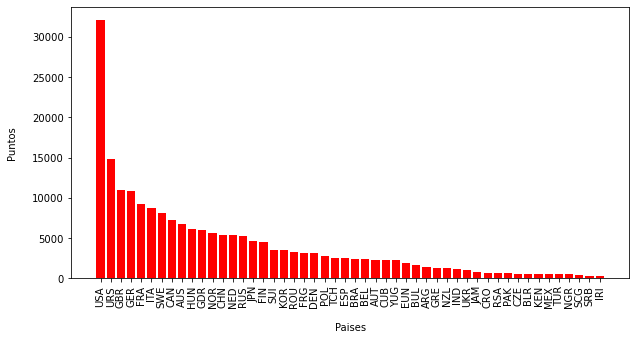

In [85]:
plt.figure(figsize=(10,5))
plt.bar(resultado_valor_pais.map(lambda x:x[0]).take(50),resultado_valor_pais.map(lambda x:x[1]).take(50) 
            , color='r')
plt.xticks(rotation=90)
plt.xlabel('Paises',labelpad=15)
plt.ylabel('Puntos',labelpad=15)
plt.show()

# Crear data Frames

In [186]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, IntegerType , StringType ,FloatType, Row
from pyspark.sql import SQLContext

In [243]:
sc = SparkContext(master='local',appName='Spark_app')


# Creo un sql Context 
sql_context = SQLContext(sc)

In [10]:
%ls /home/cesar/Documents/prac_sp/curso-apache-spark-platzi/files/

deporte.csv      deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv           paises.csv
deportista.csv   juegos.csv           resultados.csv


In [11]:
!head -n 5 /home/cesar/Documents/prac_sp/curso-apache-spark-platzi/files/juegos.csv

,nombre_juego,annio,temporada,ciudad
1,1896 Verano,1896,Verano,Athina
2,1900 Verano,1900,Verano,Paris
3,1904 Verano,1904,Verano,St. Louis
4,1906 Verano,1906,Verano,Athina


## Crear el DF desde un archivo

**Creeo la estructura del schema** , para luego leer el archivo

In [12]:
path = '/home/cesar/Documents/prac_sp/curso-apache-spark-platzi/files/'
#Creo un schema para poder cargar el archivo  
juegoSchema = (StructType
               ([
    StructField('id',IntegerType(),False), #El tercer atributo hace referencia a si es obligatorio que exista el dato
    StructField('year',IntegerType(),False),
    StructField('season',StringType(),False),
    StructField('city',StringType(),False)
])
              )

Cargo el archivo como una base de datos 

In [13]:
juegos_df = sql_context.read.schema(juegoSchema).option('header','true').csv(path+'juegos.csv')
juegos_df.show(5)

+---+----+------+------+
| id|year|season|  city|
+---+----+------+------+
|  1|null|  1896|Verano|
|  2|null|  1900|Verano|
|  3|null|  1904|Verano|
|  4|null|  1906|Verano|
|  5|null|  1908|Verano|
+---+----+------+------+
only showing top 5 rows



## Crear el DF desde un RDD

In [14]:
deportista_rdd.take(2)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199']]

### Elimino el header 

In [196]:
def delete_header(RDD):
    return iter(list(RDD)[1:])

In [197]:
deportista_rdd = deportista_rdd.mapPartitions(delete_header)
deportista_rdd.take(5)

#deportista_rdd.mapPartitionsWithIndex(delete_header).take(25) 
#También lo puedo hacer de esta manera, pero tengo que colocar el idx en la función delete_header

[['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278'],
 ['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705']]

Convierto cada valor al que le corresponde

In [208]:
deportista_rdd = deportista_rdd.map(lambda x: 
                   (
                       int(x[0]),
                       str(x[1]),
                       int(x[2]),
                       int(x[3]),
                       float(x[4]),
                       float(x[5]),
                       int(x[6])
                   )
                  )

Creo el schema de la tabla de deportista

In [214]:
deportista_schema = (StructType
                ([
                    StructField('id',IntegerType(),False),
                    StructField('name',StringType(),False),
                    StructField('gender',IntegerType(),False),
                    StructField('age',IntegerType(),False),
                    StructField('height',FloatType(),False),
                    StructField('weight',FloatType(),False),
                    StructField('equipo_id',IntegerType(),False),
])
                    )

In [215]:
deportista_df = sql_context.createDataFrame(deportista_rdd,deportista_schema)

In [216]:
deportista_df.show()

+---+--------------------+------+---+------+------+---------+
| id|                name|gender|age|height|weight|equipo_id|
+---+--------------------+------+---+------+------+---------+
|  1|           A Dijiang|     1| 24| 180.0|  80.0|      199|
|  2|            A Lamusi|     1| 23| 170.0|  60.0|      199|
|  3| Gunnar Nielsen Aaby|     1| 24|   0.0|   0.0|      273|
|  4|Edgar Lindenau Aabye|     1| 34|   0.0|   0.0|      278|
|  5|Christine Jacoba ...|     2| 21| 185.0|  82.0|      705|
|  6|     Per Knut Aaland|     1| 31| 188.0|  75.0|     1096|
|  7|        John Aalberg|     1| 31| 183.0|  72.0|     1096|
|  8|Cornelia Cor Aalt...|     2| 18| 168.0|   0.0|      705|
|  9|    Antti Sami Aalto|     1| 26| 186.0|  96.0|      350|
| 10|Einar Ferdinand E...|     1| 26|   0.0|   0.0|      350|
| 11|  Jorma Ilmari Aalto|     1| 22| 182.0|  76.5|      350|
| 12|   Jyri Tapani Aalto|     1| 31| 172.0|  70.0|      350|
| 13|  Minna Maarit Aalto|     2| 30| 159.0|  55.5|      350|
| 14|Pir

### Convirtiendo la tabla de resultados en un dataframe

In [244]:
resultado.take(2)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['4', 'Gold', '4', '2', '4']]

In [245]:
resultado_f = resultado.mapPartitions(delete_header)

In [246]:
resultado_f = resultado_f.map(lambda x :
              (
                  int(x[0]),
                  str(x[1]),
                  int(x[2]),
                  int(x[3]),
                  int(x[4])
              )
             )

In [247]:
resultado_f.take(2)

[(4, 'Gold', 4, 2, 4), (38, 'Bronze', 15, 7, 19)]

In [248]:
resultado_schema = StructType([
    StructField('resultado_id',IntegerType(),False),
    StructField('medal',StringType(),False),
    StructField('deportista_id',IntegerType(),False),
    StructField('juego_id',IntegerType(),False),
    StructField('evento_id',IntegerType(),False)
    
])

In [250]:
resultado_df = sql_context.createDataFrame(resultado_f,resultado_schema)

In [251]:
resultado_df.show(5)  

+------------+------+-------------+--------+---------+
|resultado_id| medal|deportista_id|juego_id|evento_id|
+------------+------+-------------+--------+---------+
|           4|  Gold|            4|       2|        4|
|          38|Bronze|           15|       7|       19|
|          39|Bronze|           15|       7|       20|
|          41|Bronze|           16|      50|       14|
|          42|Bronze|           17|      17|       21|
+------------+------+-------------+--------+---------+
only showing top 5 rows



### Convirtiendo la tabla de paises en un dataframe

In [26]:
RDD_paises.take(2)

[['id', 'equipo', 'sigla'], ['1', '30. Februar', 'AUT']]

In [27]:
RDD_paises_f = RDD_paises.mapPartitions(delete_header)

RDD_paises_f = RDD_paises_f.map(lambda x :
              (
                  int(x[0]),
                  str(x[1]),
                  str(x[2])
              )
             )
RDD_paises_f.take(2)

[(1, '30. Februar', 'AUT'), (2, 'A North American Team', 'MEX')]

In [28]:
paises_schema = StructType([
    StructField('team_id',IntegerType(),False),
    StructField('team',StringType(),False),
    StructField('sigla',StringType(),False)
])

In [41]:
paises_df = sql_context.createDataFrame(RDD_paises_f,paises_schema)

In [42]:
paises_df.show(5)

+-------+--------------------+-----+
|team_id|                team|sigla|
+-------+--------------------+-----+
|      1|         30. Februar|  AUT|
|      2|A North American ...|  MEX|
|      3|           Acipactli|  MEX|
|      4|             Acturus|  ARG|
|      5|         Afghanistan|  AFG|
+-------+--------------------+-----+
only showing top 5 rows



# Manejo de DF

Ver el schema de un df

In [47]:
resultado_df.printSchema()

root
 |-- resultado_id: integer (nullable = false)
 |-- medal: string (nullable = false)
 |-- deportista_id: integer (nullable = false)
 |-- juego_id: integer (nullable = false)
 |-- evento_id: integer (nullable = false)



In [166]:
deportista_df.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- name: string (nullable = false)
 |-- gender: integer (nullable = false)
 |-- age: integer (nullable = false)
 |-- height: integer (nullable = false)
 |-- weight: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



Cambiar el nombre de una columna y borrar otra 

In [167]:
deportista_df = deportista_df.withColumnRenamed('gender','sex').drop('height')

In [168]:
deportista_df.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- name: string (nullable = false)
 |-- sex: integer (nullable = false)
 |-- age: integer (nullable = false)
 |-- weight: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [169]:
deportista_df.sort('age').filter((deportista_df.age != 0) ).show(5)

+-------------+--------------------+---+---+------+---------+
|deportista_id|                name|sex|age|weight|equipo_id|
+-------------+--------------------+---+---+------+---------+
|        71691|  Dimitrios Loundras|  1| 10|   0.0|      333|
|        52070|        Etsuko Inada|  2| 11|   0.0|      514|
|        40129|    Luigina Giavotti|  2| 11|   0.0|      507|
|        37333|Carlos Bienvenido...|  1| 11|   0.0|      982|
|        47618|Sonja Henie Toppi...|  2| 11|  45.0|      742|
+-------------+--------------------+---+---+------+---------+
only showing top 5 rows



### Selecionar columnas y hacer alias 

In [65]:
from pyspark.sql.functions import col
deportista_df.select('deportista_id','name',col('age').alias('age_when_play')).show() 
# El col lo que hace es tomar una lista completa de la columna, esto evita ir row by row, lo cúal nos ayuda a tares pesadas

+-------------+--------------------+-------------+
|deportista_id|                name|age_when_play|
+-------------+--------------------+-------------+
|            1|           A Dijiang|           24|
|            2|            A Lamusi|           23|
|            3| Gunnar Nielsen Aaby|           24|
|            4|Edgar Lindenau Aabye|           34|
|            5|Christine Jacoba ...|           21|
|            6|     Per Knut Aaland|           31|
|            7|        John Aalberg|           31|
|            8|Cornelia Cor Aalt...|           18|
|            9|    Antti Sami Aalto|           26|
|           10|Einar Ferdinand E...|           26|
|           11|  Jorma Ilmari Aalto|           22|
|           12|   Jyri Tapani Aalto|           31|
|           13|  Minna Maarit Aalto|           30|
|           14|Pirjo Hannele Aal...|           32|
|           15|Arvo Ossian Aaltonen|           22|
|           16|Juhamatti Tapio A...|           28|
|           17|Paavo Johannes A

# Hacer un join de DF

In [79]:
!ls /home/cesar/Documents/prac_sp/curso-apache-spark-platzi/files/

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv
deportista.csv	 juegos.csv	      resultados.csv


In [80]:
evento_schema = StructType([
    StructField('evento_id',IntegerType(),False),
    StructField('name:evento',StringType(),False),
    StructField('deporte_id',IntegerType(),False)
])

In [81]:
evento_df = sql_context.read.option('header','true').csv(path+'evento.csv')

In [83]:
deporte_schema = StructType([
    StructField('deporte_id',IntegerType(),False),
    StructField('sport_name',StringType(),False),
])
deporte_df = sql_context.read.option('header','true').csv(path+'deporte.csv')

In [165]:
print(*'-'+'deportista')
deportista_df.printSchema()
print(*'-'+'resultado')
resultado_df.printSchema()
print(*'-'+'equipo')
paises_df.printSchema()
print(*'-'+'juegos')
juegos_df.printSchema()
print(*'-'+'evento')
evento_df.printSchema()
print(*'-'+'deporte')
deporte_df.printSchema()

- d e p o r t i s t a
root
 |-- deportista_id: integer (nullable = false)
 |-- name: string (nullable = false)
 |-- gender: integer (nullable = false)
 |-- age: integer (nullable = false)
 |-- height: integer (nullable = false)
 |-- weight: float (nullable = false)
 |-- equipo_id: integer (nullable = false)

- r e s u l t a d o
root
 |-- resultado_id: integer (nullable = false)
 |-- medal: string (nullable = false)
 |-- deportista_id: integer (nullable = false)
 |-- juego_id: integer (nullable = false)
 |-- evento_id: integer (nullable = false)

- e q u i p o
root
 |-- team_id: integer (nullable = false)
 |-- team: string (nullable = false)
 |-- sigla: string (nullable = false)

- j u e g o s
root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- city: string (nullable = true)

- e v e n t o
root
 |-- evento_id: string (nullable = true)
 |-- evento: string (nullable = true)
 |-- deporte_id: string (nullable = true)

- d e

In [30]:
sc

<SparkContext master=local appName=Olimpic_games>

# Parar

In [189]:
sc.stop()